<a href="https://colab.research.google.com/github/Tagtshen/Assignment-1-Computational-physics/blob/main/A3_Tagtshen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question1: Fourier transform of Sinc(x)

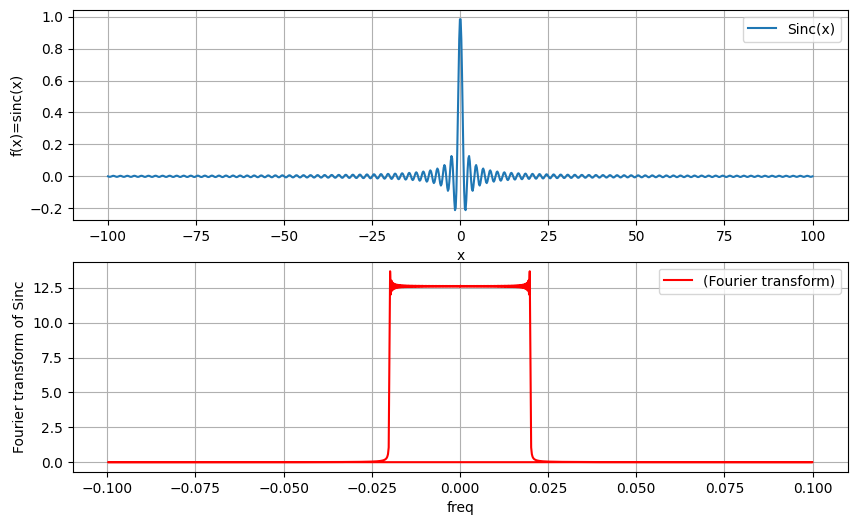

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def func_(xmin, xmax,n,d):
    x = np.linspace(xmin, xmax, n)
    kq=(2*np.pi)/(n*d)*np.arange(0,n,1)
    f = np.sinc(x)  # Calculate f for all elements of x
    # Handle the case when x is 0
    f[np.abs(x) < 1e-10] = 1  # Set f to 1 where x is approximately 0 to avoid division by zero
    DFT=np.fft.fft(f)
    FT= d*np.sqrt(n/(2*np.pi))*np.exp(-1j*kq*xmin)*DFT
    return f,DFT,FT
xmin = -100
xmax = 100
n = 1000
d=(xmin-xmax)/n
freq = np.fft.fftfreq(n,1/d)
x= np.linspace(xmin, xmax, n)
f1,f2,f3= func_(xmin, xmax, n,d)
plt.figure(figsize=(10, 6))
#Plot of orginal f(x)=Sin(x)/x function
plt.subplot(2, 1, 1)
plt.plot(x,f1, label='Sinc(x)')
plt.xlabel('x')
plt.ylabel('f(x)=sinc(x)')
plt.legend()
plt.grid(True)
plt.legend()
# Plot of the fourier transformed
plt.subplot(2, 1, 2)
plt.plot(freq,np.abs(f3), label='(Fourier transform)', color='red')
plt.xlabel('freq')
plt.ylabel('Fourier transform of Sinc')
plt.legend()
plt.grid(True)
plt.legend()
# Show both plots
plt.show()




Question 5: DFT wiht and without FFT

In [ ]:
# First part with 4 x inputs
import numpy as np
import time
def dft(x):

    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        X[k] = sum(x[n] *np.exp(-2j * np.pi * k * n / N) for n in range(N))
    return X

x = np.array([6,3,8,2,4])

start_time = time.time()
FFT = np.fft.fft(x)
FFT_time = time.time() - start_time

start_time = time.time()
X = dft(x)
DFT_time = time.time() - start_time

DFT_numpy=np.fft.fft(x)
print("DFT of", x)
print("without numpy.fft.fft:", X)
print("And using numpy.fft.fft:",FFT)
print("Time taken in each case is:","without np.fft.fft :",DFT_time,"with np.fft.fft :",FFT_time)
print("The difference in computation  time is: ",DFT_time- FFT_time)


DFT of [6 3 8 2 4]
without numpy.fft.fft: [23.        +0.j          0.07294902-2.575655j    3.42705098+6.29412435j
  3.42705098-6.29412435j  0.07294902+2.575655j  ]
And using numpy.fft.fft: [23.        +0.j          0.07294902-2.575655j    3.42705098+6.29412435j
  3.42705098-6.29412435j  0.07294902+2.575655j  ]
Time taken in each case is: without np.fft.fft : 0.0002994537353515625 with np.fft.fft : 0.0029027462005615234
The difference in computation  time is:  -0.002603292465209961


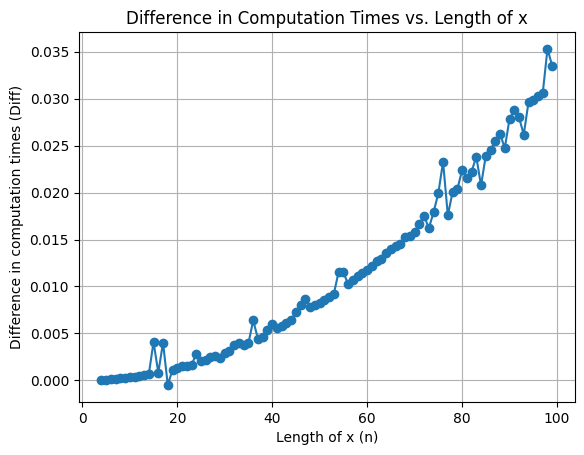

In [13]:
#part two of question 5
import numpy as np
import time
import matplotlib.pyplot as plt
n_values = []
diff_values = []
for i in range (4,100,1):
  x=np.arange(i)
  n=len(x)
  def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        X[k] = sum(x[n] *np.exp(-2j * np.pi * k * n / N) for n in range(N))
    return X

  start_time = time.time()
  FFT = np.fft.fft(x)
  FFT_time = time.time() - start_time

  start_time = time.time()
  X = dft(x)
  DFT_time = time.time() - start_time
  Diff= DFT_time-FFT_time
  n_values.append(n)
  diff_values.append(Diff)

plt.plot(n_values, diff_values, marker='o')
plt.xlabel('Length of x (n)')
plt.ylabel('Difference in computation times (Diff)')
plt.title('Difference in Computation Times vs. Length of x')
plt.grid(True)
plt.show()


question 6: FT of a constant function

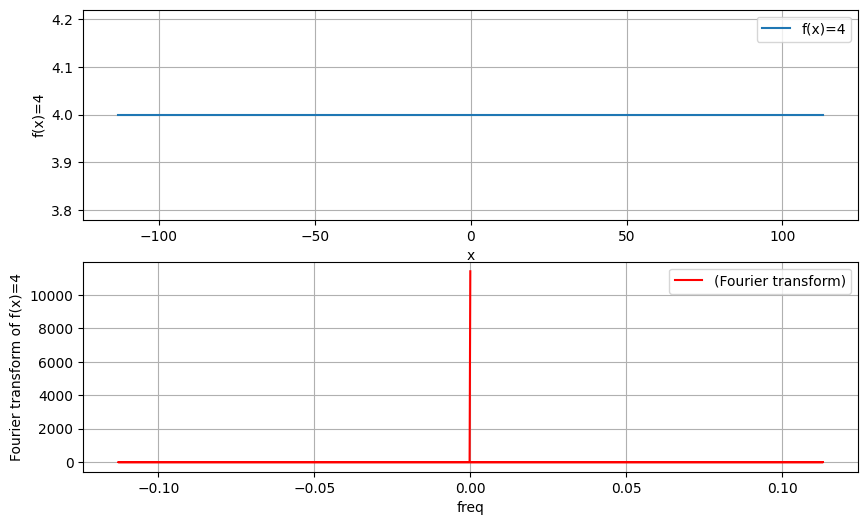

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def func_(xmin, xmax,n,d):
    x = np.linspace(xmin, xmax, n)
    kq=(2*np.pi)/(n*d)*np.arange(0,n,1)
    constant_value=a
    constant_f =np.full(n,constant_value)
     # Calculate f for all elements of x
    # Handle the case when x is 0
    # f[np.abs(x) < 1e-10] = 1  # Set f to 1 where x is approximately 0 to avoid division by zero
    DFT=np.fft.fft(constant_f)
    FT= d*np.sqrt(n/(2*np.pi))*np.exp(-1j*kq*xmin)*DFT
    return constant_f,DFT,FT
xmin = -113
xmax = 113
a=4
n = 1000
d=(xmin-xmax)/n
freq = np.fft.fftfreq(n,1/d)
x= np.linspace(xmin, xmax, n)
f1,f2,f3= func_(xmin, xmax, n,d)

plt.figure(figsize=(10, 6))
#Plot of orginal f(x)=Sin(x)/x function
plt.subplot(2, 1, 1)
plt.plot(x,f1, label=f'f(x)={a}')
plt.xlabel('x')
plt.ylabel(f'f(x)={a}')
plt.legend()
plt.grid(True)
plt.legend()
# Plot of the fourier transformed
plt.subplot(2, 1, 2)
plt.plot(freq,np.abs(f3), label='(Fourier transform)', color='red')
plt.xlabel('freq')
plt.ylabel(f'Fourier transform of f(x)={a}')
plt.legend()
plt.grid(True)
plt.legend()
# Show both plots
plt.show()




Question 11: convolution of box function with itself

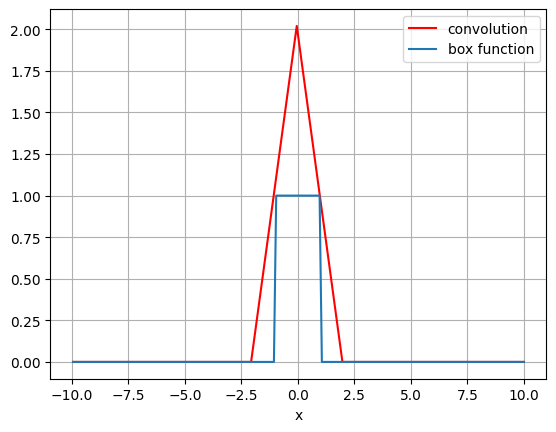

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if -1 <= x <= 1:
        return 1
    else:
        return 0
def g(x):
    if -1 <= x <= 1:
        return 1
    else:
        return 0
xmin=-5
xmax=5
n=100
d=(xmax-xmin)/(n-1)

x=[]
f_x=[]
g_x=[]
for i in range (n): # we have created an array for storing the values of x ,f(x) and g(x)
  x.append(xmin+i*d)
  f_x.append(f(xmin+i*d))
  g_x.append(g(xmin+i*d))

xmin=x[0]
xmax=x[-1]
for i in range(n):
    g_x.append(0)
    f_x.append(0)
    if (i<n/2):
        x.append(xmin-i*d)
    else:
        x.append(i*d)

x.sort()

DFT_g = np.fft.fft(g_x,norm='ortho')
DFT_f= np.fft.fft(f_x,norm='ortho')

# now we do calculation for numerical convolution
product= [] # definitng a null set to store the porduct of fourier transform of f and g
for i in range(2*n):
    product.append(DFT_g[i]*DFT_f[i])

conv = d*(2*n)**0.5*np.fft.ifft(product,norm='ortho')

shifted_f=np.zeros(2*n)
for p in range(n):
  shifted_f[int(n/2)+p]=f_x[p]

plt.plot(x,conv,label='convolution',color='red')
plt.plot(x,shifted_sample,label='box function')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.legend()

plt.show()

Question 12 : Convolution of given function

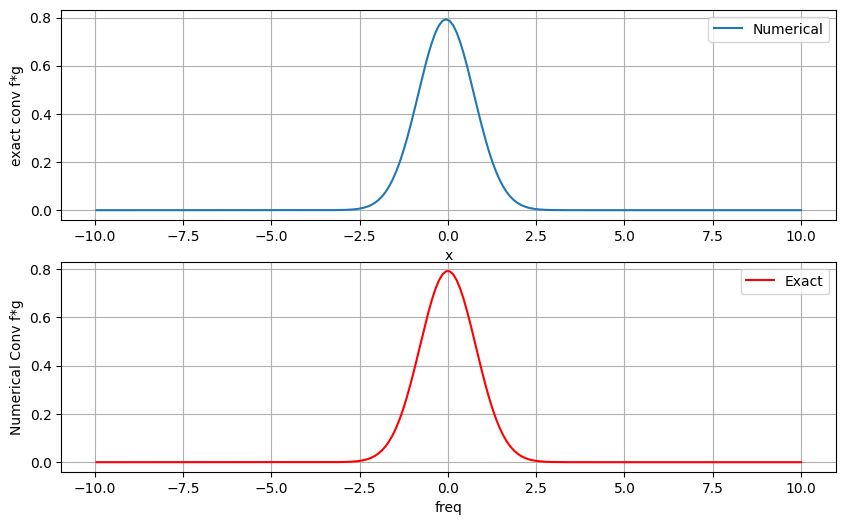

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.exp(-x**2)
def g(x):
  return np.exp(-4*x**2)
xmin=-5
xmax=5
n=100
d=(xmax-xmin)/(n-1)

x=[]
f_x=[]
g_x=[]
for i in range (n): # we have created an array for storing the values of x ,f(x) and g(x)
  x.append(xmin+i*d)
  f_x.append(f(xmin+i*d))
  g_x.append(g(xmin+i*d))

xmin=x[0]
xmax=x[1]
for i in range(n):
    g_x.append(0)
    f_x.append(0)
    if (i<n/2):
        x.append(xmin-i*d)
    else:
        x.append(i*d)

x.sort()

DFT_g = np.fft.fft(g_x,norm='ortho')
DFT_f= np.fft.fft(f_x,norm='ortho')

# now we do calculation for numerical convolution
product= [] # definitng a null set to store the porduct of fourier transform of f and g
for i in range(2*n):
    product.append(dft_g[i]*dft_h[i])

conv = d*(2*n)**0.5*np.fft.ifft(product,norm='ortho')



def exact(x):
    return (np.pi/5)**0.5*np.exp(-4*x**2/5) # exact solution

exact_sol = []
for i in range(len(x)):
    exact_sol.append(exact(x[i]))

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x,conv,label='Numerical')
plt.xlabel('x')
plt.ylabel("exact conv f*g")
plt.legend()
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x,exact_sol,color='red',label='Exact')
plt.xlabel('freq')
plt.ylabel("Numerical Conv f*g")
plt.legend()
plt.grid(True)
plt.legend()

plt.show()


Question 12:

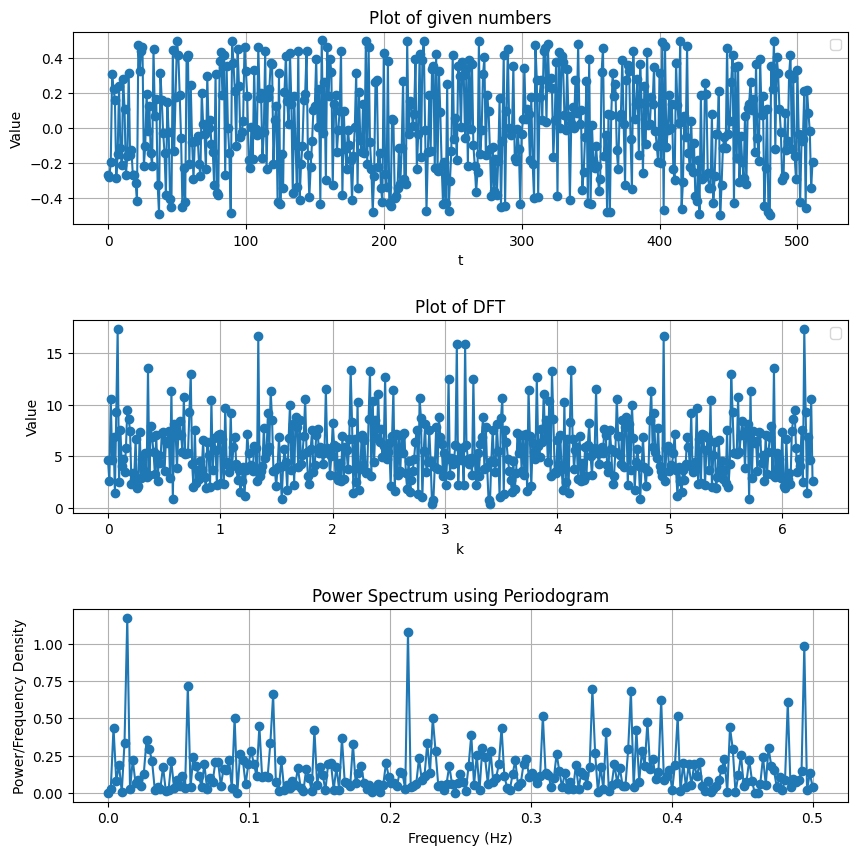

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram

# Given numbers
numbers = [
    -0.2688931478, -0.2810077245, -0.1922479660, 0.3091979974, 0.2222252908,
    0.1613411458, -0.2850525372, -0.1462660015, 0.2383177011, -0.1163222947,
    -0.2107665697, 0.2794335902, 0.1097473095, -0.2700622617, -0.1569469031,
    0.3154710894, -0.1542748938, -0.1228533915, -0.2685363088, -0.2706004769,
    -0.3131989550, -0.4134391376, 0.4736741665, 0.3248944824, 0.4393124037,
    0.4636855849, -0.2148542479, -0.1027268702, 0.1919177595, -0.0186060666,
    0.1284019093, -0.1448753710, -0.2158862392, 0.4499158768, 0.0662298126,
    0.1664744150, -0.3243225187, -0.4877341576, 0.3132713010, 0.1605180492,
    -0.0300435355, -0.1404964128, -0.3842669269, 0.1490853727, -0.0208928628,
    -0.4061146504, -0.4477310102, 0.4457973697, -0.1300296032, 0.1782116066,
    0.4941732508, 0.4192766741, 0.1903923343, -0.0584654533, -0.4529298266,
    -0.2255067279, -0.4193502346, 0.4065179655, 0.4159499907, -0.2035951729,
    0.2457494360, -0.0794226600, -0.2901544887, -0.0727141017, -0.0712154848,
    -0.0480344683, -0.2032156676, -0.2721751027, 0.2003425085, 0.0222111261,
    -0.0326823389, -0.2317628865, 0.2963619249, -0.0018480210, 0.0451257549,
    -0.0884823951, -0.1366931894, -0.3238729143, 0.3093830799, -0.3720557997,
    -0.3809198358, 0.3854499106, 0.4342140600, 0.1890028576, 0.4148572116,
    -0.2652322833, 0.3543577498, -0.0012045510, -0.1449663307, -0.4866423891,
    0.4972425832, 0.3691724294, 0.2127248183, -0.1000293446, 0.4538417287,
    0.2416511807, -0.0494115795, -0.0208211201, 0.0393769004, 0.4649650382,
    0.3259142931, 0.1820071668, -0.1811153500, -0.2259159014, 0.0070567507,
    -0.1744164121, 0.3337702579, -0.0076109614, -0.0414694034, 0.4608695249,
    0.1741148816, 0.2015143138, -0.1709438733, -0.0234580208, 0.4420949296,
    -0.2363370773, 0.1757330040, 0.2218480908, 0.3698033298, 0.3641769557,
    -0.2052430754, 0.0441521098, 0.1260436292, -0.4214207662, 0.3125290635,
    -0.4344462586, -0.1492507378, -0.3397884398, 0.2074336803, 0.4132356827,
    0.1533315449, 0.0223901605, 0.4257616097, 0.1373595073, -0.3680075735,
    0.1810860740, -0.0983058754, -0.3380408455, 0.4381654479, -0.4078960414,
    -0.2064848651, -0.1045514065, 0.1597545188, 0.1971594977, 0.4403414952,
    -0.1543259115, -0.3960711281, -0.2249333170, -0.0748893775, 0.1055080290,
    0.1239680179, 0.3964286441, 0.0055255260, 0.2227701163, -0.4311765587,
    0.4997682507, -0.0256645448, 0.2618468747, -0.2985797851, 0.4651833422,
    0.1823202714, 0.3951940054, 0.3188235662, -0.3267912622, 0.1381094853,
    0.1912400989, -0.1374391515, -0.0137524858, 0.0999000988, 0.4384287600,
    -0.3810104572, 0.0989857201, -0.1219142943, -0.2323025167, -0.0084752803,
    -0.0959240393, -0.1802103670, -0.4094217666, -0.1587128268, 0.0069855862,
    0.3144493505, -0.3400278989, 0.2084851144, -0.0702426640, -0.1363942434,
    0.1388616342, -0.1419713932, 0.4974452706, -0.2057381493, 0.4645380866,
    -0.0783973306, -0.2307541423, -0.4765782746, -0.2761129658, 0.2612273102,
    0.2723423436, -0.2221928202, -0.1404235328, -0.3407537528, -0.4195234529,
    0.4283436452, -0.2599081802, -0.3381139600, 0.3844613902, -0.4257620632,
    -0.4424250120, 0.0533426725, 0.0472734651, -0.4007835397, -0.3904993618,
    -0.3430244529, -0.1142090034, -0.3189218420, -0.1146375095, 0.2665106277,
    -0.2918969728, -0.3185800818, 0.4948427771, -0.0340734205, 0.1557761495,
    0.1395409782, 0.0127733780, 0.0799938097, 0.3929924017, -0.2311356734,
    -0.0364105928, 0.4217797039, -0.1677400775, 0.3866631873, 0.4957021796,
    -0.0099139093, -0.4705211506, -0.1393616016, 0.1907406441, -0.1306292928,
    0.3349619327, 0.3545584651, -0.2306519561, 0.4213670821, -0.2436592655,
    0.3272163106, 0.0922066886, -0.2142314968, -0.4359845642, -0.1953429579,
    -0.4284385401, 0.2508732423, -0.4732244336, -0.3032378787, -0.1330076925,
    0.4195754632, -0.0615863321, 0.0570527665, -0.1832797849, 0.3567231621,
    0.2966164478, 0.0068158073, 0.3782229727, 0.3046564488, -0.0569208908,
    0.3343066315, -0.2168519072, 0.3904585269, -0.0066840006, 0.3651324332,
    -0.0980781085, -0.2142906532, -0.3648754396, -0.2502778997, 0.4948167490,
    -0.1472523165, -0.0123950469, 0.3064336825, 0.4039521713,-0.1562121040, 0.1858216386, 0.0994145103, -0.1204108562, -0.3896181526,
    -0.1071225009, -0.3564925128, -0.1773885688, -0.3837084775, -0.1862398968,
    0.1687682610, -0.4497164194, -0.0714710128, 0.4188877659, -0.4468807352,
    0.0964925673, 0.4504939428, 0.0022001593, -0.0388540504, -0.0112084481,
    0.3551627236, -0.1700265878, -0.1889034194, -0.0065659980, -0.1185203130,
    -0.4342549056, -0.0311296036, 0.0500648836, 0.3426145638, 0.0522112215,
    0.1079246041, 0.0820888064, -0.1819618765, 0.1755609468, -0.2035594361,
    -0.3966161057, 0.4726386336, 0.2767121459, -0.3931200935, 0.1756969377,
    0.2724708813, 0.0470965910, 0.4417624155, 0.4557813918, 0.0344782876,
    0.4786553766, 0.2354691601, 0.2864441505, 0.2304293633, -0.1677529749,
    0.0439665851, 0.3779601436, -0.3861732616, 0.4340362182, -0.0018690717,
    0.4107975176, 0.3769004680, 0.0747563964, -0.0123534109, 0.3373881707,
    0.0668507700, -0.4102420359, 0.0305692646, 0.1191738630, 0.0030397234,
    0.2714063378, 0.0840811582, 0.4785699911, 0.0213568872, 0.1046718012,
    -0.3509441530, -0.2501563882, -0.0524206469, 0.2713582529, -0.4277286228,
    0.3947431776, -0.4340261434, 0.0184627988, -0.1896349619, -0.2269720294,
    -0.1048609236, -0.2161377543, -0.3602818859, -0.2880756999, 0.3209966981,
    0.4594355443, -0.1604861223, -0.0378117836, -0.4803753723, 0.0805769874,
    -0.4774751545, 0.0746606846, 0.3132175096, 0.1851760856, 0.2505643943,
    -0.1252832976, -0.2362305390, 0.0659467017, 0.0790520471, 0.3887243611,
    0.0255425742, -0.3253029645, 0.2770132140, 0.3577057862, 0.3274063601,
    -0.0620715297, -0.3481241756, 0.4385074312, 0.0503388007, 0.1372275604,
    0.2781829706, -0.1524395060, 0.3630088496, 0.1402449903, -0.2586887058,
    0.2402416255, -0.0914683820, 0.4345668051, 0.0178548495, 0.0235960573,
    0.1748014803, 0.1378490267, 0.3483589624, -0.0182005467, -0.1000946151,
    -0.1956506170, 0.3169495635, -0.1970418729, 0.4882094728, -0.4689174131,
    0.4675137422, -0.1053128088, -0.0096113963, 0.1910356885, -0.0017009643,
    0.1365611811, -0.2313575872, -0.2965491990, 0.3722384649, 0.1307385429,
    0.0284579935, 0.4947678780, -0.4623690642, -0.3090349524, 0.0703530758,
    -0.0483598009, 0.4673100101, -0.1426239907, -0.2246162880, 0.0423456524,
    -0.2485113713, -0.0871401889, -0.3863106527, -0.4166992338, -0.1836406969,
    -0.4916457555, 0.1911872022, -0.2896305939, -0.2779338124, 0.2592139314,
    0.1916831875, -0.2562667750, -0.3402340529, -0.3420934822, 0.0816257894,
    -0.4280744903, -0.2712001230, -0.0362488444, -0.0348191190, 0.2126541038,
    -0.4987648535, -0.3269551541, -0.1114189952, -0.0499611610, -0.1148002156,
    0.4592351001, -0.0342124412, 0.0385683716, 0.2605691546, 0.4150499708,
    -0.4263958465, 0.3485023935, -0.1704071293, 0.3536687763, -0.3053288139,
    -0.0455971667, -0.1930114252, -0.2856206428, 0.0706783286, -0.3185279769,
    0.1119589766, 0.1373302609, 0.2636431266, 0.1021125240, 0.1677644687,
    -0.1346017009, 0.3666984382, -0.0560845254, -0.1871539567, 0.3933074539,
    0.0760030189, 0.1818607044, -0.4457157393, -0.2280601730, 0.1074412063,
    -0.4764554878, -0.4982547354, 0.3543523400, 0.2219605532, 0.4987254582,
    -0.1194746553, 0.4047470905, 0.3165419179, 0.1112622336, -0.0203710814,
    -0.2989903583, -0.2744101785, 0.0836632692, -0.1261773549, -0.0740820180,
    0.3069539012, 0.4171672869, -0.1168545518, 0.2831904921, -0.1615675323,
    -0.2914377234, 0.3315184893, -0.0354904732, -0.4233418332, -0.0760012985,
    -0.0609809196, 0.2111052715, -0.4536339399, 0.2177576926, 0.0879100401,
    -0.0182817977, -0.3402847618, -0.1927347599
]

numbers_array = np.array(numbers)
DFT= np.fft.fft(numbers_array)
n=len(numbers)
x = range(n)
k=(2*np.pi)/(n)*np.arange(0,n,1)

frequencies, power_spectrum = periodogram(numbers_array, fs=1)

k = 10  # Number of bins
bin_edges = np.linspace(0, frequencies[-1], k+1)  # Define bin edges
bin_indices = np.digitize(frequencies, bin_edges)  # Compute bin indices
binned_power_spectrum = np.zeros(k)  # Initialize binned power spectrum
for i in range(k):
    mask = bin_indices == (i + 1)  # Mask for elements in current bin
    binned_power_spectrum[i] = np.mean(power_spectrum[mask])  # Mean of power spectrum in current bin


plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(4, 1, 1)
plt.plot(x, numbers_array, marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of given numbers')
plt.legend()
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(k,abs(DFT), marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Value')
plt.title('Plot of DFT')
plt.legend()
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(frequencies, power_spectrum, marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency Density')
plt.title('Power Spectrum using Periodogram')
plt.grid(True)
plt.show()

plt.subplot(4, 1, 4)

plt.bar(bin_edges[:-1], binned_power_spectrum, width=np.diff(bin_edges), align='edge', edgecolor='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Binned Power/Frequency Density')
plt.title('Binned Power Spectrum')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# READING THE FILE ******************************************************

with open('noise.txt') as file:
    f = file.readlines()
    f = [float(item.rstrip()) for item in f]


N = len(f)
x = [i for i in range(N)]
#*************************************************************************

# FINDING DFT ***********************************************************


dft = np.fft.fft(f,norm='ortho')
k = np.fft.fftfreq(N)               #JUST GIVES q/N

sorted = []
for i in range(N):
    sorted.append([k[i],dft[i]])
sorted.sort(key=lambda x:x[0])

kf,dftf = [],[]
for i in range(N):
    kf.append(sorted[i][0])
    dftf.append(sorted[i][1])


# OBTAINING THE POWER SPECTRUM ********************************************

period = [np.abs(x)**2 for x in dftf]

# BINNING THE SPECTRUM ****************************************************

kmin,kmax = kf[0],kf[-1]
bin = 50
delta = (kmax-kmin)/bin
k_bin,per_bin = [],[]

d = delta
n = 0
for i in range(1,bin+1):
    dftb = 0
    print('i=',i)
    while(kf[n]<kf[0]+i*d):
        dftb = dftb + period[n]
        n = n+1
        print('n =',n)
        if(n==len(kf)):
            break
    per_bin.append(dftb)
    k_bin.append(kf[0]+i*d)






# PLOTTING EVERYTHING *************************************************************

figure, ax = plt.subplots(2, 2)

ax[0,0].plot(x,f)
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Data')

ax[0,1].plot(kf,dftf)

ax[1,0].plot(kf,period)

ax[1,1].plot(k_bin,per_bin)

plt.show()